# Trabajo Práctico 1

Karen Raczkowski

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
#%matplotlib qt
# Importar librerías
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Parte 1

1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

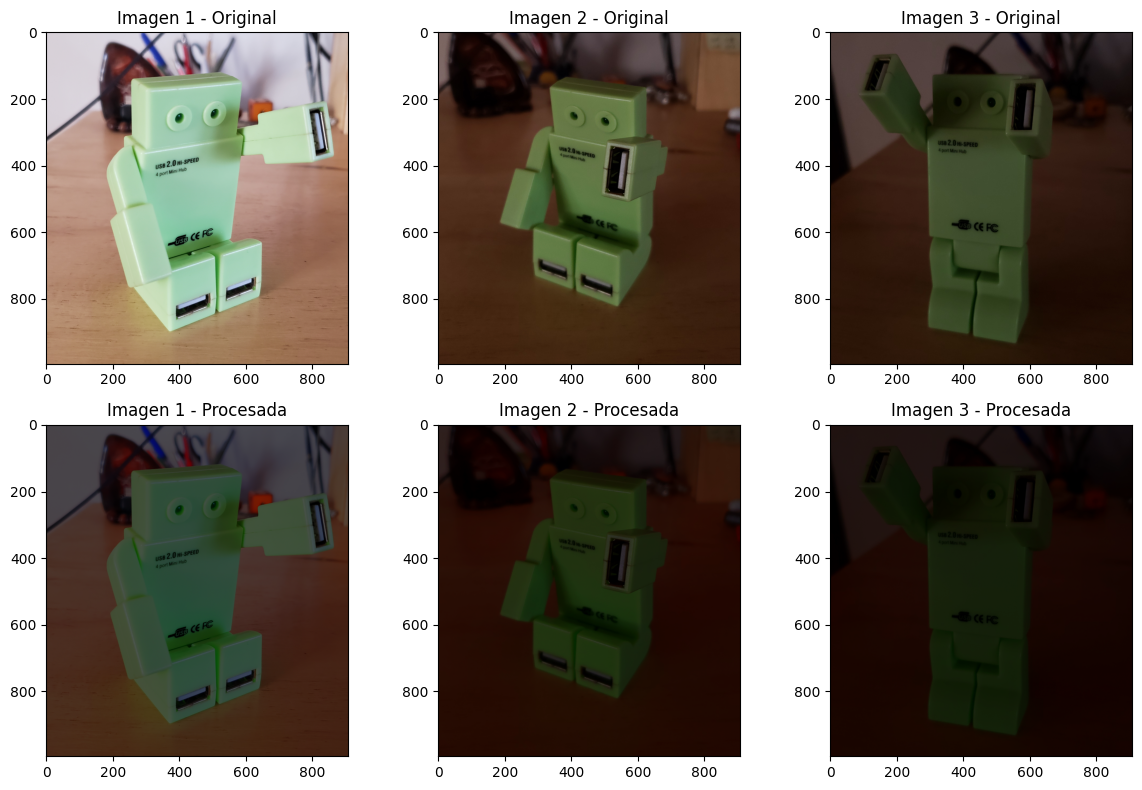

In [7]:
def chromatic_coordinates(input_image: np.ndarray) -> np.ndarray:
    h, w, _ = input_image.shape
    img_output = np.zeros(input_image.shape, np.float16)
    input_image = input_image.astype(np.float16)

    for i in range(h):
        for j in range(w):
            if (input_image[i, j] == 0).all():
                img_output[i, j] = 0
            else:
                r = input_image[i, j][0]
                g = input_image[i, j][1]
                b = input_image[i, j][2]
                r_output = r / (r + g + b)
                g_output = g / (r + g + b)
                b_output = b / (r + g + b)
                img_output[i, j] = (r * r_output, g * g_output, b * b_output)

    img_output = img_output.astype(np.uint8)
    return img_output

# Cargar las imágenes
img_1 = cv2.imread("./coord_cromaticas/CoordCrom_1.png")
img_2 = cv2.imread("./coord_cromaticas/CoordCrom_2.png")
img_3 = cv2.imread("./coord_cromaticas/CoordCrom_3.png")

# Aplicar el algoritmo de coordenadas cromáticas a cada imagen
output_1 = chromatic_coordinates(img_1)
output_2 = chromatic_coordinates(img_2)
output_3 = chromatic_coordinates(img_3)

# Crear una figura con dos filas y tres columnas
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Mostrar las imágenes originales en la parte superior
axes[0, 0].imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Imagen 1 - Original')
axes[0, 1].imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Imagen 2 - Original')
axes[0, 2].imshow(cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB))
axes[0, 2].set_title('Imagen 3 - Original')

# Mostrar las imágenes procesadas en la parte inferior
axes[1, 0].imshow(cv2.cvtColor(output_1, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Imagen 1 - Procesada')
axes[1, 1].imshow(cv2.cvtColor(output_2, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Imagen 2 - Procesada')
axes[1, 2].imshow(cv2.cvtColor(output_3, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title('Imagen 3 - Procesada')

plt.tight_layout()
plt.show()

2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [10]:
def white_patch(img):
    # Convertir la imagen de BGR a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Obtener los valores máximos de los canales R, G y B
    max_r = np.max(img_rgb[:, :, 0])
    max_g = np.max(img_rgb[:, :, 1])
    max_b = np.max(img_rgb[:, :, 2])

    # Normalizar los canales dividiendo por los valores máximos
    img_normalized = img_rgb.astype(np.float32) / np.array([max_r, max_g, max_b])

    # Asegurar que los valores normalizados estén en el rango [0, 1]
    img_normalized = np.clip(img_normalized, 0, 1)

    # Convertir la imagen de nuevo a BGR
    img_normalized_bgr = cv2.cvtColor(img_normalized, cv2.COLOR_RGB2BGR)

    return img_normalized_bgr

# Cargar la imagen
img_b = cv2.imread("./white_patch/test_blue.png")
img_g = cv2.imread("./white_patch/test_green.png")
img_r = cv2.imread("./white_patch/test_red.png")
img_b2 = cv2.imread("./white_patch/wp_blue.jpg")
img_g2 = cv2.imread("./white_patch/wp_green.png")
img_g3 = cv2.imread("./white_patch/wp_green2.jpg")
img_r2 = cv2.imread("./white_patch/wp_red.png")
img_r3 = cv2.imread("./white_patch/wp_red2.jpg")

# Aplicar el algoritmo White Patch a cada imagen
# Definir un diccionario de imágenes originales
original_images = {'img_b': img_b, 'img_g': img_g, 'img_r': img_r,'img_b2': img_b2, 'img_g2': img_g2, 'img_g3': img_g3,'img_r2': img_r2, 'img_r3': img_r3}

# Aplicar el algoritmo White Patch a cada imagen en un bucle
normalized_images = {}
for key, img in original_images.items():
    normalized_img = white_patch(img)
    normalized_images[key + '_normalized'] = normalized_img

# Mostrar las imágenes originales y normalizadas
original_images = [img_b, img_g, img_r, img_b2, img_g2, img_g3, img_r2, img_r3]
normalized_images = [img_b_normalized, img_g_normalized, img_r_normalized, img_b2_normalized, img_g2_normalized, img_g3_normalized, img_r2_normalized, img_r3_normalized]

# Mostrar las imágenes originales y normalizadas en un bucle
for i, img in enumerate(original_images):
    img_normalized = normalized_images[i]
    cv2.imshow(f'Imagen original - {i+1}', img)
    cv2.imshow(f'Imagen normalizada - {i+1}', img_normalized)
    cv2.waitKey(0)

# Cerrar todas las ventanas emergentes al final
cv2.destroyAllWindows()

3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch

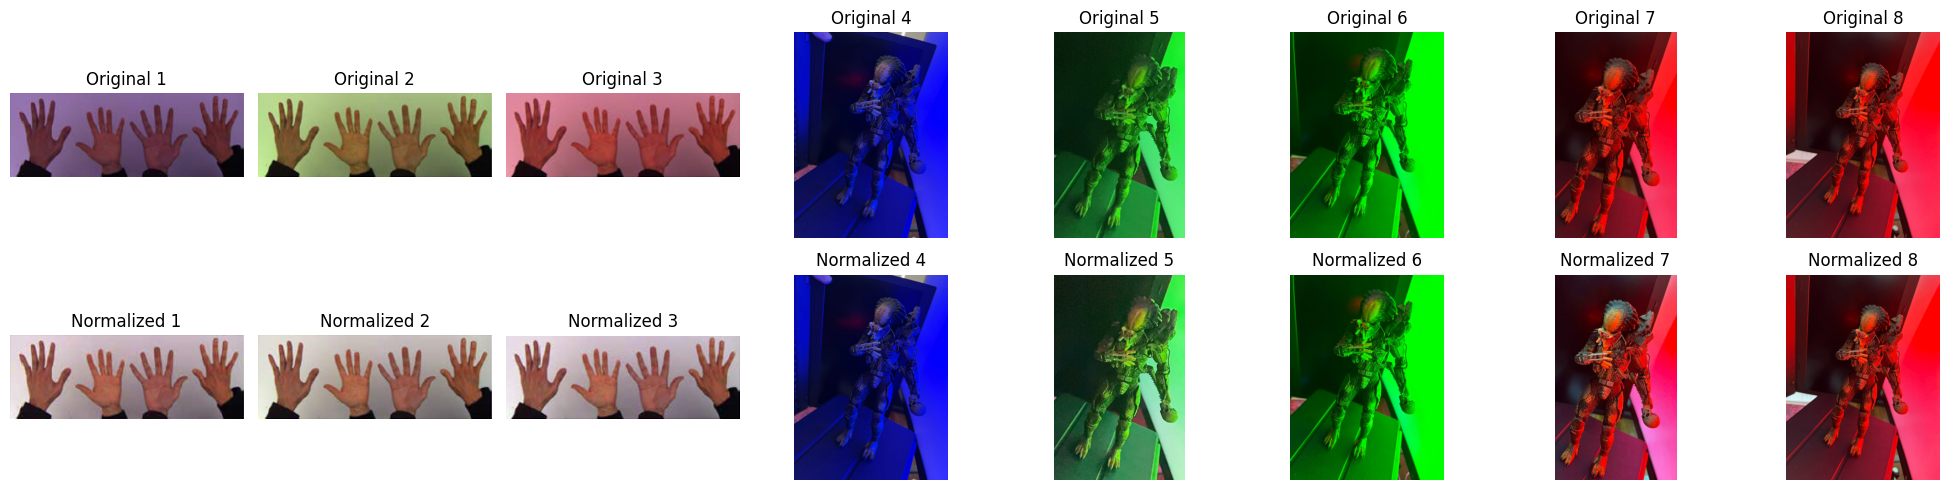

In [11]:
# Mostrar las imágenes originales y normalizadas en una cuadrícula
fig, axes = plt.subplots(2, 8, figsize=(20, 5))

for i, (original_img, normalized_img) in enumerate(zip(original_images, normalized_images)):
    # Mostrar imagen original
    axes[0, i].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axes[0, i].set_title(f'Original {i+1}')
    axes[0, i].axis('off')
    
    # Mostrar imagen normalizada
    axes[1, i].imshow(cv2.cvtColor(normalized_img, cv2.COLOR_BGR2RGB))
    axes[1, i].set_title(f'Normalized {i+1}')
    axes[1, i].axis('off')

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()

Se puede observar que para las primeras 3 imágenes, el algoritmo parece funcionar. Sin embargo, las correcciones no son significativas en las últlimas 5 imágenes. En imágenes con una dominancia de un color particular (azul, verde, rojo), como ocurre en las últimas 5 imágenes, la aplicación del algoritmo White Patch no produce una corrección de color significativa. Esto se debe a que el algoritmo se basa en la suposición de que el píxel más brillante en la imagen es un blanco ideal y normaliza los canales de color dividiéndolos por los valores máximos. Si la imagen ya tiene una dominancia de un color específico, la suposición de un blanco ideal no se cumple, los valores máximos de los canales correspondientes ya serán altos, y dividir los canales por estos valores no resultará en una reducción significativa de la dominancia del color. Como resultado, la imagen procesada seguirá mostrando una fuerte presencia de ese color.

A continuación se analiza la dominancia de color en las últimas 5 imágenes.

In [17]:
# Función para analizar la dominancia de color
def analyze_color_dominance(image):
    avg_blue = np.mean(image[:, :, 0])
    avg_green = np.mean(image[:, :, 1])
    avg_red = np.mean(image[:, :, 2])

    if avg_red > avg_green and avg_red > avg_blue:
        return "Dominancia de color rojo"
    elif avg_green > avg_red and avg_green > avg_blue:
        return "Dominancia de color verde"
    elif avg_blue > avg_red and avg_blue > avg_green:
        return "Dominancia de color azul"
    else:
        return "Sin dominancia clara de color"

# Analizar la dominancia de color en cada imagen
dominance_b2 = analyze_color_dominance(img_b2)
dominance_g2 = analyze_color_dominance(img_g2)
dominance_g3 = analyze_color_dominance(img_g3)
dominance_r2 = analyze_color_dominance(img_r2)
dominance_r3 = analyze_color_dominance(img_r3)

# Imprimir los resultados
print("Imagen wp_blue.jpg:", dominance_b2)
print("Imagen wp_green.png:", dominance_g2)
print("Imagen wp_green2.jpg:", dominance_g3)
print("Imagen wp_red.png:", dominance_r2)
print("Imagen wp_red2.jpg:", dominance_r3)

Imagen wp_blue.jpg: Dominancia de color azul
Imagen wp_green.png: Dominancia de color verde
Imagen wp_green2.jpg: Dominancia de color verde
Imagen wp_red.png: Dominancia de color rojo
Imagen wp_red2.jpg: Dominancia de color rojo


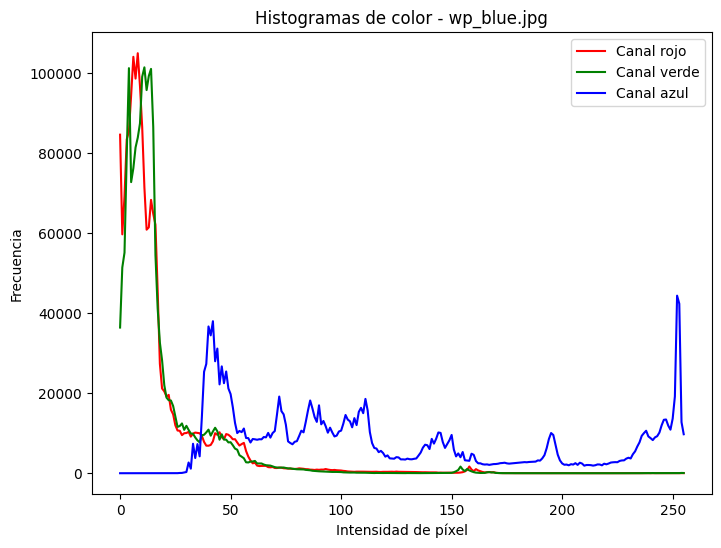

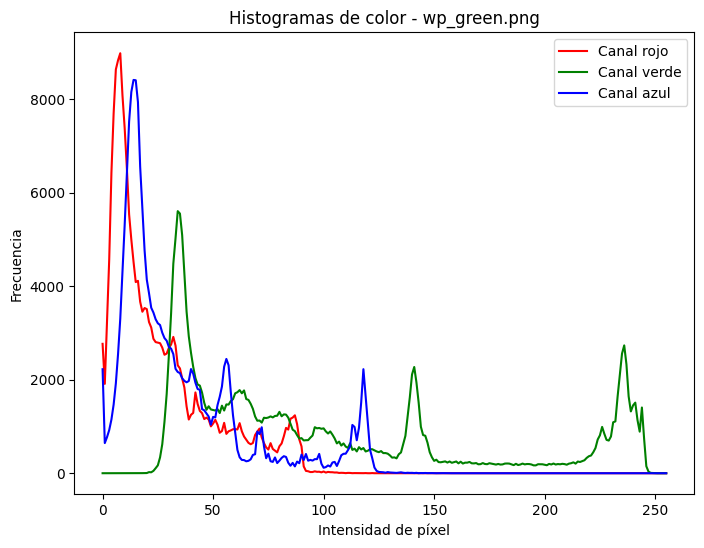

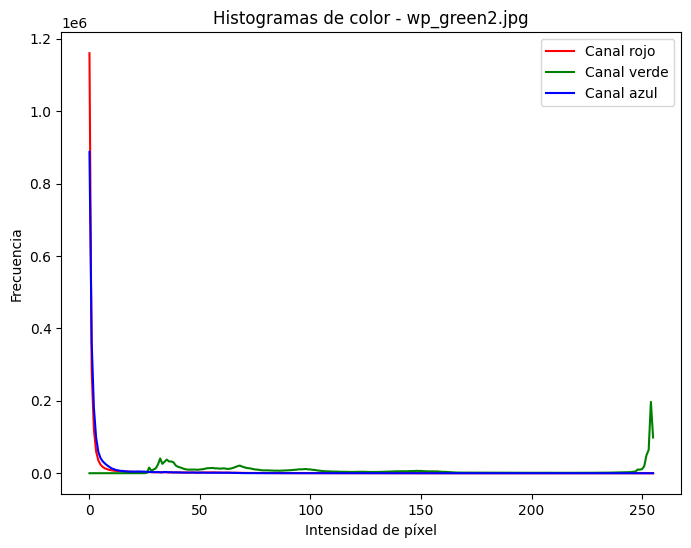

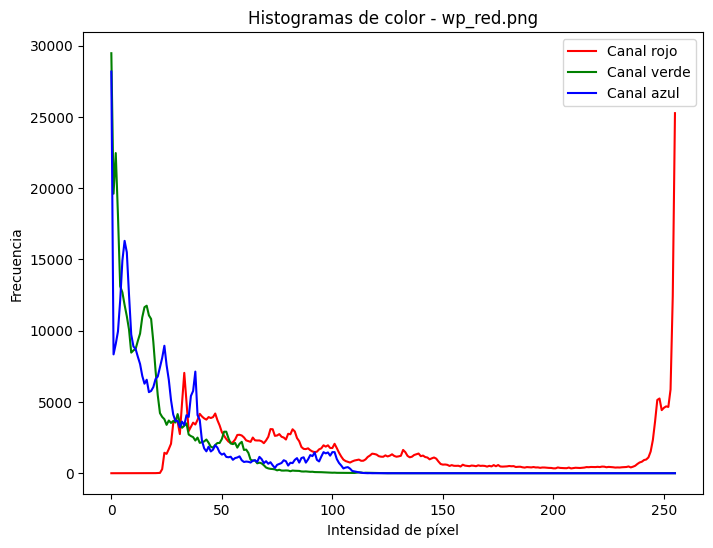

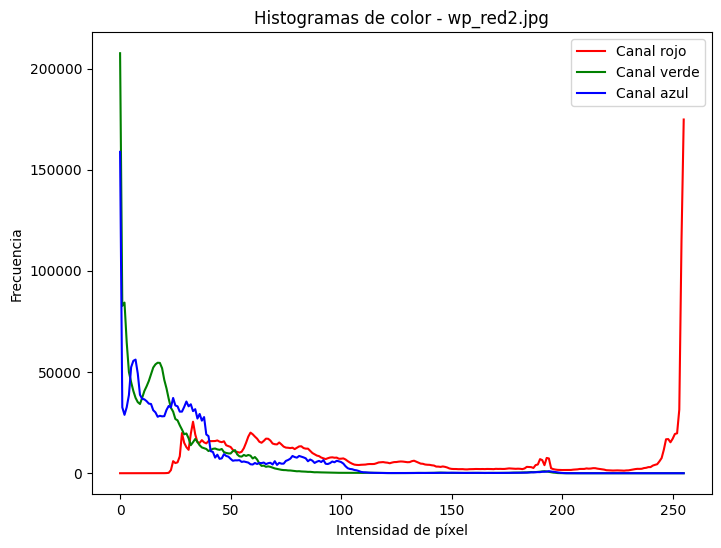

In [19]:
# Calcular y visualizar los histogramas de color de cada imagen
images = [
    {"image": img_b2, "name": "wp_blue.jpg"},
    {"image": img_g2, "name": "wp_green.png"},
    {"image": img_g3, "name": "wp_green2.jpg"},
    {"image": img_r2, "name": "wp_red.png"},
    {"image": img_r3, "name": "wp_red2.jpg"}
]

for img_data in images:
    img = img_data["image"]
    img_name = img_data["name"]

    # Convertir la imagen de BGR a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Calcular los histogramas de cada canal de color
    hist_r = cv2.calcHist([img_rgb], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([img_rgb], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([img_rgb], [2], None, [256], [0, 256])

    # Visualizar los histogramas
    plt.figure(figsize=(8, 6))
    plt.plot(hist_r, color='r', label='Canal rojo')
    plt.plot(hist_g, color='g', label='Canal verde')
    plt.plot(hist_b, color='b', label='Canal azul')
    plt.xlabel('Intensidad de píxel')
    plt.ylabel('Frecuencia')
    plt.title(f'Histogramas de color - {img_name}')
    plt.legend()
    plt.show()

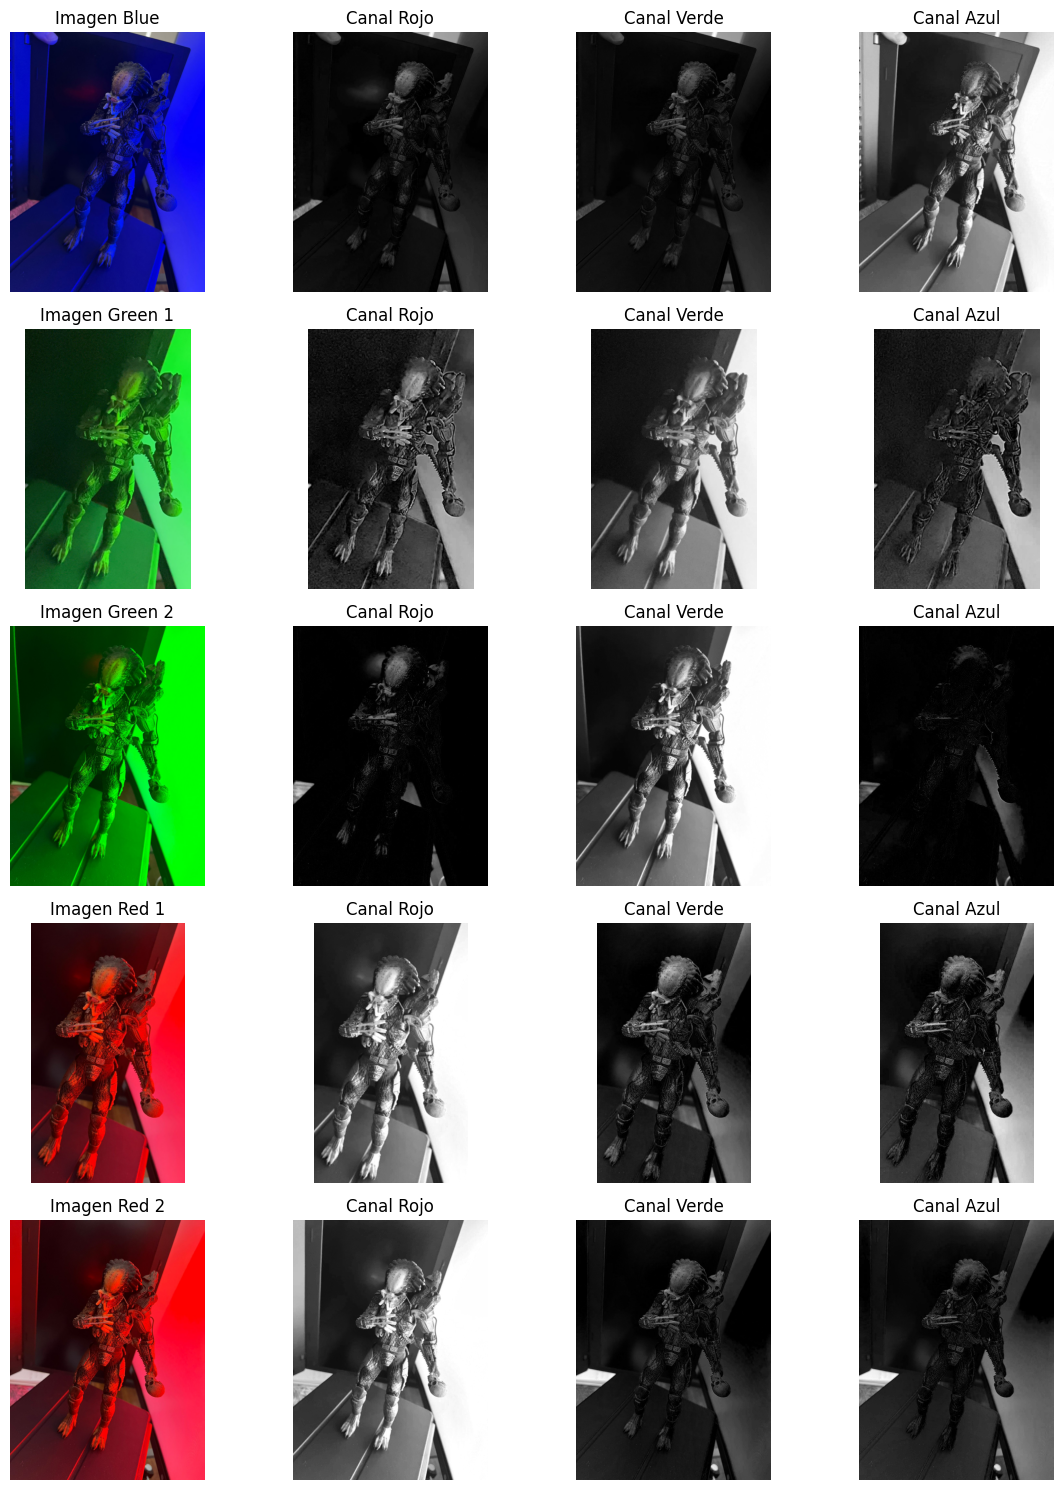

In [21]:
titles = ["Imagen Blue","Imagen Green 1","Imagen Green 2","Imagen Red 1","Imagen Red 2"]
images = [img_b2,img_g2,img_g3,img_r2,img_r3]

# Crear una figura y ejes de subfiguras
fig, axs = plt.subplots(len(images), 4, figsize=(12, 15))

# Recorrer las imágenes y mostrar los canales de color
for i, img in enumerate(images):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
    title = titles[i]

    axs[i, 0].imshow(img_rgb)
    axs[i, 0].set_title(title)
    axs[i, 0].axis('off')

    axs[i, 1].imshow(img_rgb[:, :, 0], cmap='gray')
    axs[i, 1].set_title('Canal Rojo')
    axs[i, 1].axis('off')

    axs[i, 2].imshow(img_rgb[:, :, 1], cmap='gray')
    axs[i, 2].set_title('Canal Verde')
    axs[i, 2].axis('off')

    axs[i, 3].imshow(img_rgb[:, :, 2], cmap='gray')
    axs[i, 3].set_title('Canal Azul')
    axs[i, 3].axis('off')

plt.tight_layout()
plt.show()

## Parte 2

1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

2. Elija el número de bins que crea conveniente y grafique su histograma, compare los histogramas entre sí. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como 'features' a los histogramas?

3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando máscaras, las regiones en imágenes separadas.